# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
%pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is inc

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.20.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [ ]:
# importing the libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [ ]:
# apply padding
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [ ]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Step 3: Building the model

In [ ]:
# define an object (initilizing RNN)
model = tf.keras.models.Sequential()

In [ ]:
# Embedding layer

model = tf.keras.Sequential()

# add Input layer first
model.add(tf.keras.layers.Input(shape=(100,)))   # sequence length = 100

# then add Embedding (no input_shape here)
model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=128))

# ... continue with other layers ...


In [ ]:
# LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,691,713 (10.27 MB)

 Trainable params: 2,691,713 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 113s 564ms/step - accuracy: 0.6023 - loss: 0.6469 - val_accuracy: 0.7989 - val_loss: 0.4827
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 112s 572ms/step - accuracy: 0.8219 - loss: 0.4089 - val_accuracy: 0.8366 - val_loss: 0.3786
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 127s 492ms/step - accuracy: 0.8641 - loss: 0.3301 - val_accuracy: 0.8393 - val_loss: 0.4208
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 111s 568ms/step - accuracy: 0.8837 - loss: 0.2904 - val_accuracy: 0.8178 - val_loss: 0.4480
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 150s 608ms/step - accuracy: 0.8990 - loss: 0.2597 - val_accuracy: 0.8268 - val_loss: 0.5276


In [ ]:
# predictions
y_pred = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step


In [ ]:
print(y_pred[15]), print(y_test[15])

[0.00261102]
0


(None, None)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10441  2059]
 [ 2270 10230]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.82684


# Step 5: Learning Curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

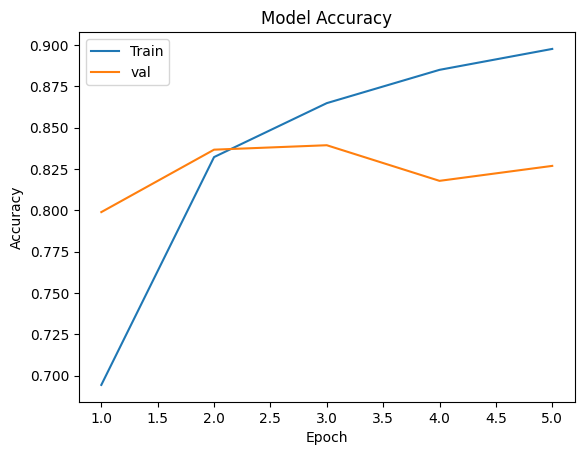

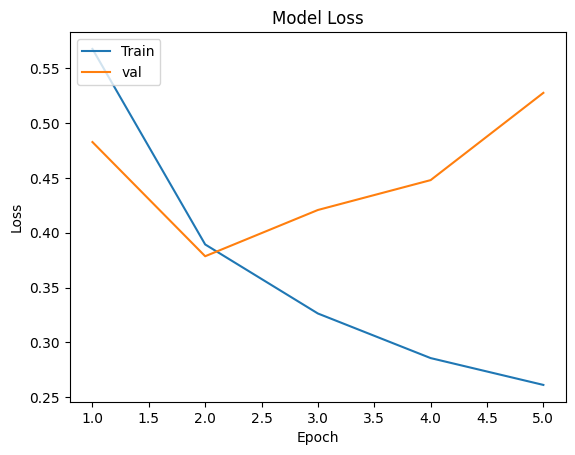

In [ ]:
learning_curve(history, 5)